In [97]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [29]:
%%html
<style>
body {
    font-size: 20px;
}
</style>    

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [99]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

Gene: YOR239W	p-value: 4.3153300474392504e-243	gene-length: 1889	shift-start-position: 810	shift-length 1075


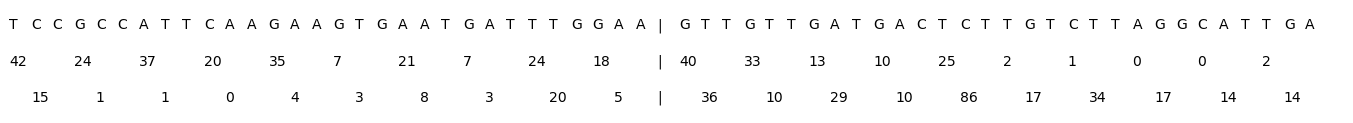

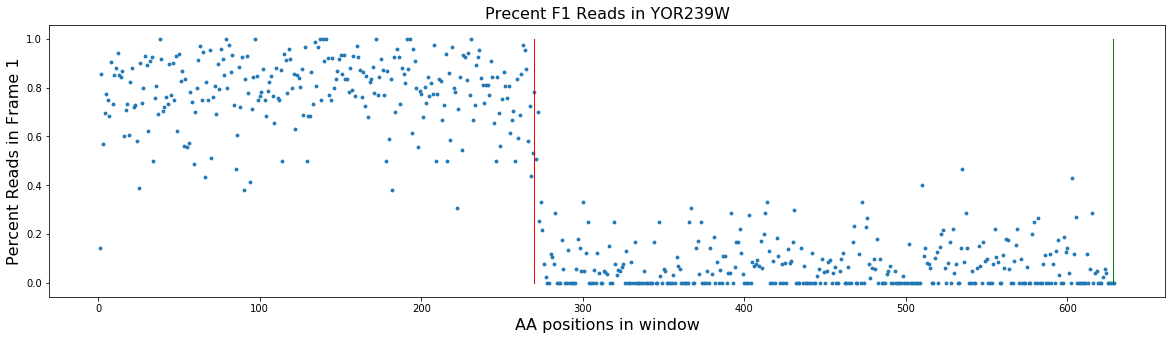


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YIL009C-A	p-value: 6.733999540797363e-40	gene-length: 548	shift-start-position: 267	shift-length 277


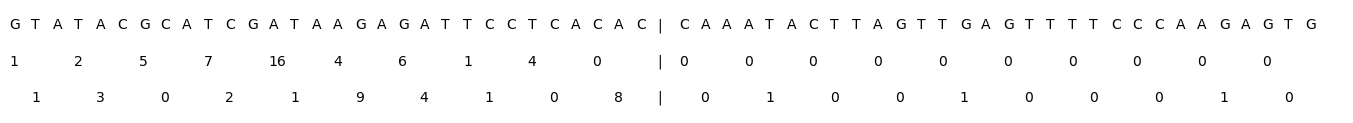

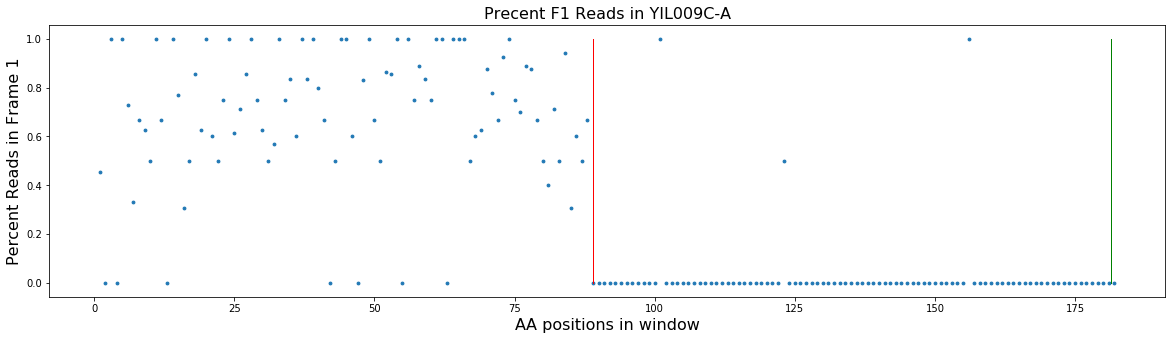


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDL137W	p-value: 2.5361521184590694e-27	gene-length: 918	shift-start-position: 345	shift-length 569


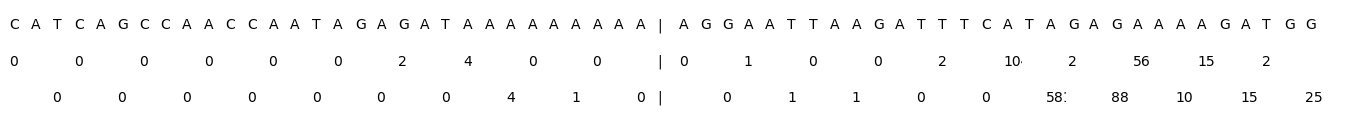

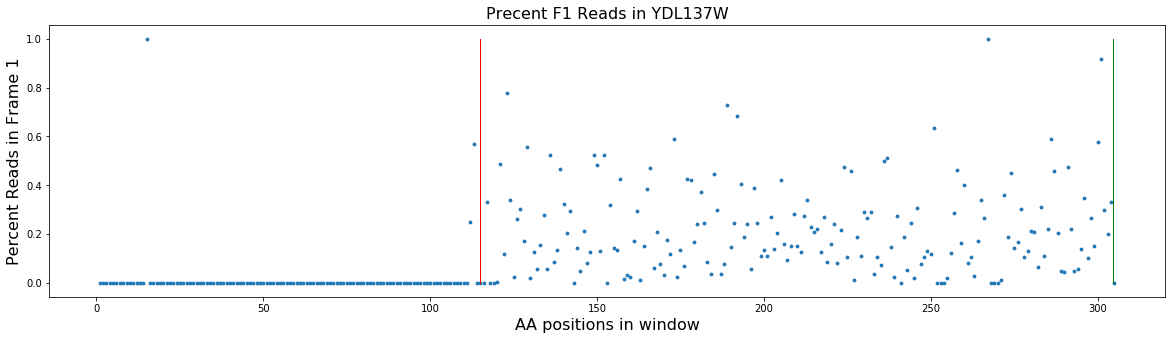


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGR027C	p-value: 1.2600378393649273e-19	gene-length: 655	shift-start-position: 300	shift-length 121


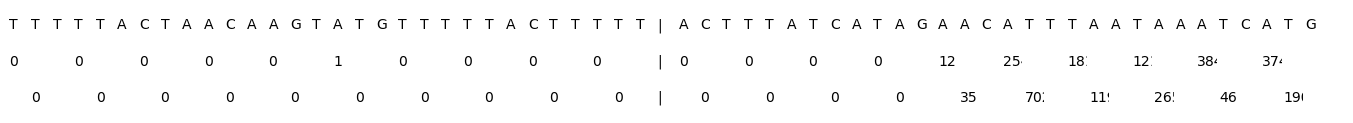

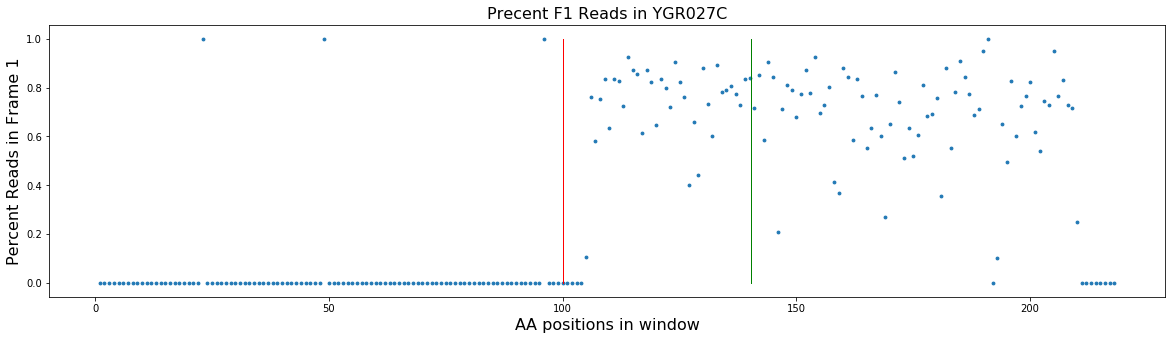


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPL052W	p-value: 4.805056131949766e-18	gene-length: 881	shift-start-position: 180	shift-length 697


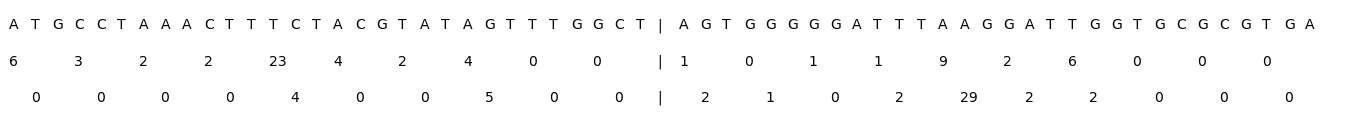

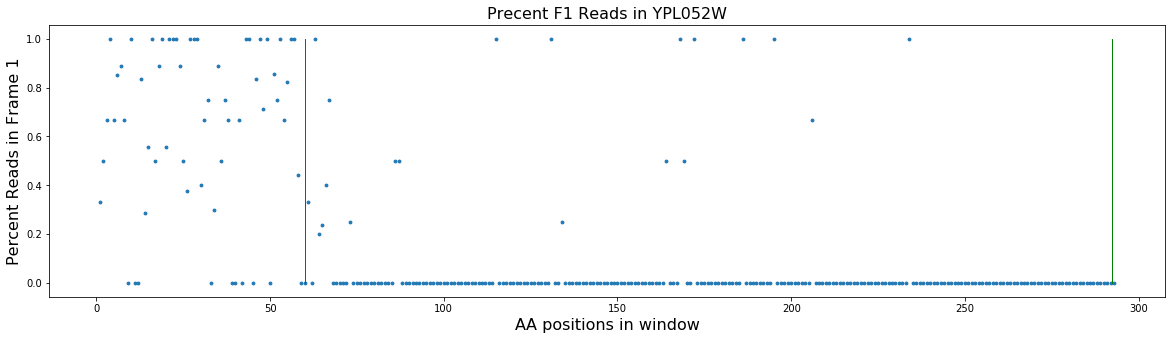


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPL230W	p-value: 9.769454861517309e-15	gene-length: 1270	shift-start-position: 1227	shift-length 34


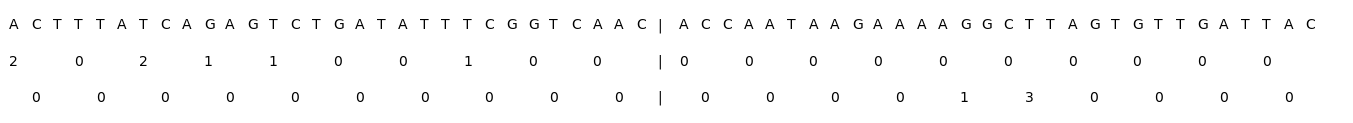

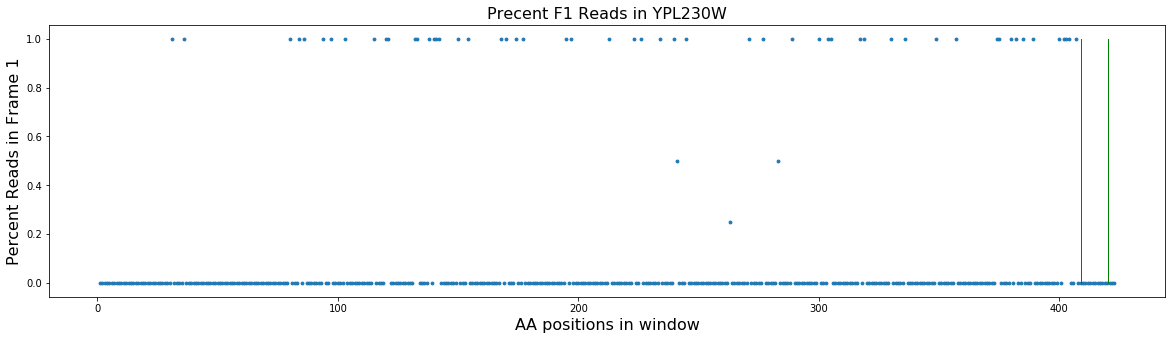


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGR084C	p-value: 1.1489627524950029e-13	gene-length: 1021	shift-start-position: 57	shift-length 97


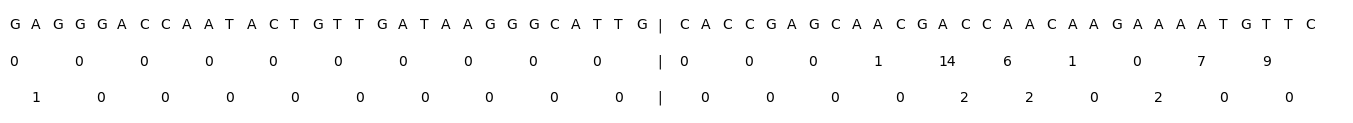

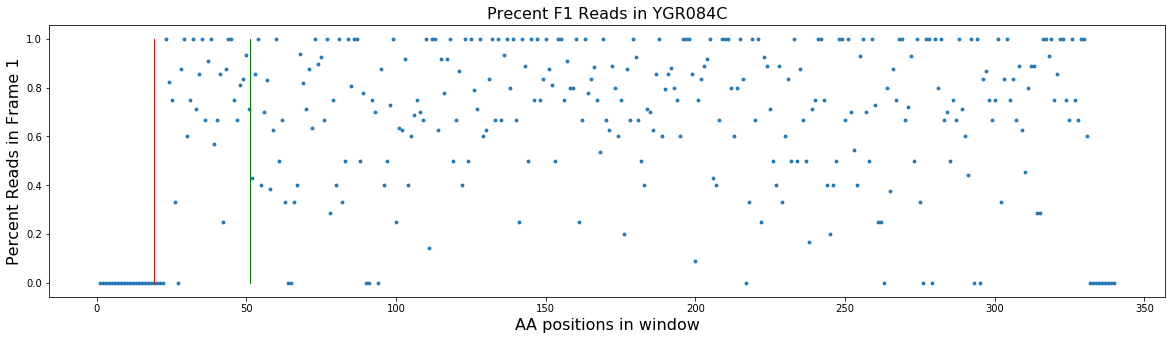


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDL109C	p-value: 4.451460216175939e-13	gene-length: 1945	shift-start-position: 1305	shift-length 38


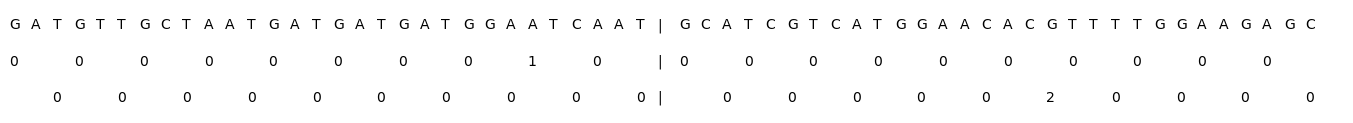

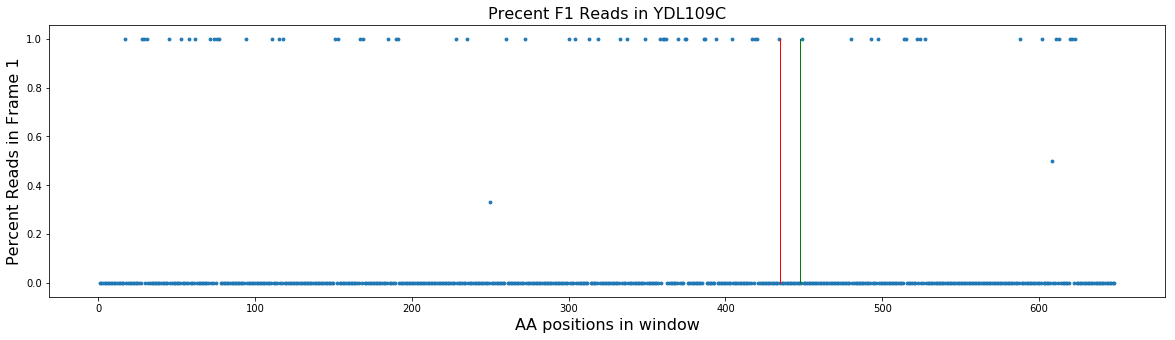


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YHR174W	p-value: 2.6125315498366943e-11	gene-length: 1315	shift-start-position: 63	shift-length 89


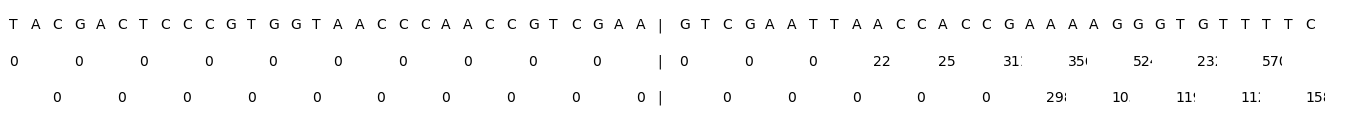

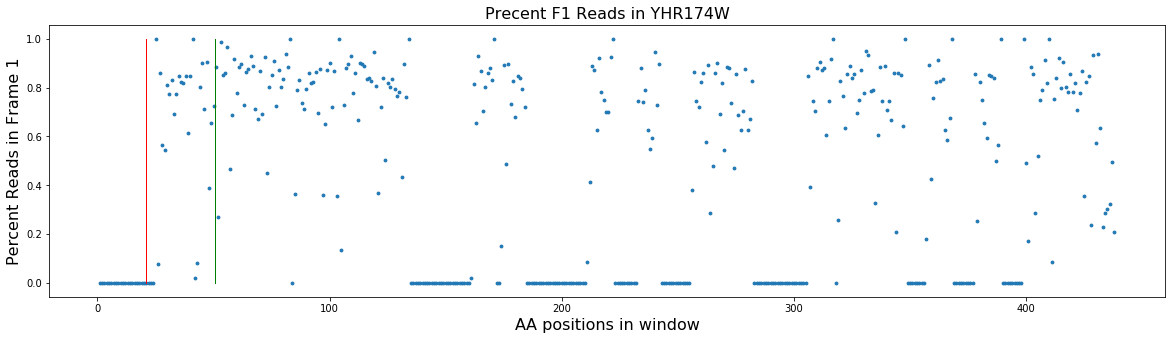


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGR295C	p-value: 1.8061980143004308e-10	gene-length: 1147	shift-start-position: 642	shift-length 130


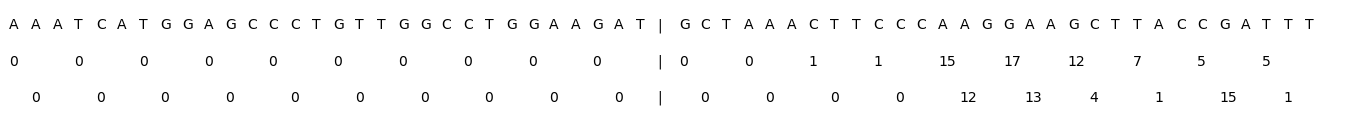

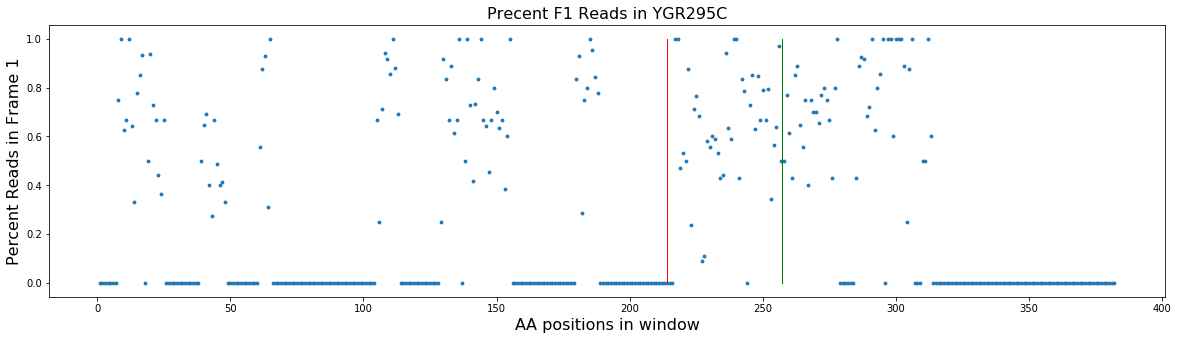


--------------------------------------------------------------------------------------------------------------------------------------------



In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import subplot

inFile = open("output/bla_25_to_32_with_found_frameshifts", "r")
counter = 0
lineList = []
import numpy as np

p_value_dict = dict()
all_info_dict = dict()

for line in inFile:
    Info_string = line.strip()
    letters = inFile.readline().rstrip("\n").split(" ")
    reads_1 = inFile.readline().rstrip("\n").split(" ")
    reads_2 = inFile.readline().rstrip("\n").split(" ")
    percents = inFile.readline().rstrip("\n").split(",")
    percents = [float(x) for x in percents]
    blank = inFile.readline()
    gene_name = Info_string.split("\t")[0].split(" ")[1]
    p_value  = float(Info_string.split("\t")[1].split(" ")[1])
    p_value_dict[gene_name] = p_value
    all_info_dict[gene_name] = dict()
    all_info_dict[gene_name]["letters"] = letters
    all_info_dict[gene_name]["read_1"] = reads_1
    all_info_dict[gene_name]["read_2"] = reads_2
    all_info_dict[gene_name]["percents"] = percents
    all_info_dict[gene_name]["Info_string"] = Info_string
     
p_value_dict = sorted(p_value_dict.items(), key=lambda x: x[1])
best_p_values = [x for (x,y) in p_value_dict[:10]]

inFile.close()

for gene_name in best_p_values:
    Info_string = all_info_dict[gene_name]["Info_string"]
    letters = all_info_dict[gene_name]["letters"]
    reads_1 = all_info_dict[gene_name]["read_1"]
    reads_2 = all_info_dict[gene_name]["read_2"]
    percents = all_info_dict[gene_name]["percents"]
        
    print(Info_string)
    table_vals = []
    #print(letters)
    #print(reads_1)
    #print(reads_2)
    table_vals.append(letters)
    table_vals.append(reads_1)
    table_vals.append(reads_2)
    
    # Draw table
    plt.figure(1, figsize=(24, 2))
    ax = subplot(111, frame_on=False) 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    the_table = ax.table(cellText=table_vals, cellLoc='left', bbox=(0, 0, 1, 1))
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    for key, cell in the_table.get_celld().items():
        cell.set_linewidth(0)
    plt.show()
    
    xs = [i+1 for i in range(0,len(percents))]
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.scatter(xs, percents, s=8)
    shift = int(Info_string.split("\t")[3].split(" ")[1])/3
    shift_end = shift + int(Info_string.split("\t")[4].split(" ")[1])/3
    #plt.ylim(0.0, 1.0)
    plt.plot([shift, shift], [0.0, 1.0], 'k-', lw=1, c="red")
    plt.plot([shift_end, shift_end], [0.0, 1.0], 'k-', lw=1, c="green")
    #plt.plot([522, 522], [0.0, 1.0], '--', lw=1, c="red")
    ax.autoscale_view()
    plt.title('Precent F1 Reads in ' + gene_name,fontsize=16)
    plt.xlabel('AA positions in window',fontsize=16)
    plt.ylabel('Percent Reads in Frame 1',fontsize=16)
    plt.show()
    print("\n" + '-'*140 + "\n")
    
    